In [62]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np

In [63]:
(xtrain, ytrain), (xtest, ytest) = keras.datasets.cifar10.load_data()

In [64]:
xtrain = xtrain / 255.0
xtest = xtest / 255.0

In [78]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [65]:
# set cnn layers to be untrainable
for layer in model.layers[:-2]:
    layer.trainable = False

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [79]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='min',verbose=1, patience=5)

In [74]:
ytrain.shape

(50000, 1)

In [80]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_20 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_21 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

In [81]:
history = model.fit(xtrain, ytrain, epochs=10, validation_data=(xtest, ytest), callbacks=[es])

Epoch 1/10
1563/1563 [==============================] - 17s 8ms/step - loss: 1.6034 - accuracy: 0.4032 - val_loss: 1.1823 - val_accuracy: 0.5745
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1570 - accuracy: 0.5848 - val_loss: 0.9755 - val_accuracy: 0.6532
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9909 - accuracy: 0.6507 - val_loss: 0.9087 - val_accuracy: 0.6809
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8973 - accuracy: 0.6868 - val_loss: 0.8556 - val_accuracy: 0.7003
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8385 - accuracy: 0.7054 - val_loss: 0.7669 - val_accuracy: 0.7299
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7940 - accuracy: 0.7221 - val_loss: 0.7659 - val_accuracy: 0.7384
Epoch 6: early stopping


In [39]:
import matplotlib.pyplot as plt

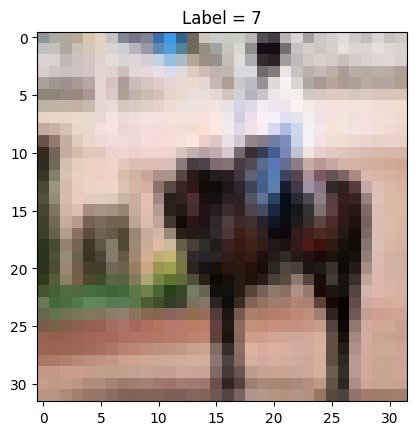

In [100]:
label_index = ytrain[11]
# Show one of the images from the training dataset
plt.title("Label = %d"%label_index)
plt.imshow(xtrain[11],cmap='gray')
plt.show()

<Axes: >

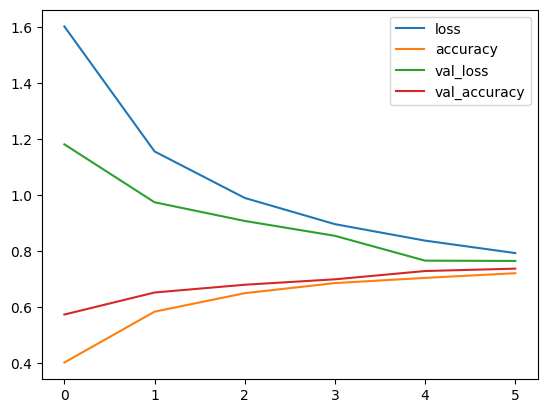

In [83]:
hist = pd.DataFrame(history.history)
hist.plot()

In [84]:
ypred = model.predict(xtest)
ypred = np.argmax(ypred,axis=1)

313/313 [==============================] - 1s 2ms/step


In [85]:
from sklearn import metrics
print(metrics.accuracy_score(ytest,ypred))
print(metrics.classification_report(ytest,ypred))

0.7384
              precision    recall  f1-score   support

           0       0.65      0.85      0.74      1000
           1       0.90      0.85      0.87      1000
           2       0.58      0.61      0.59      1000
           3       0.62      0.50      0.55      1000
           4       0.69      0.72      0.71      1000
           5       0.68      0.64      0.66      1000
           6       0.82      0.78      0.80      1000
           7       0.83      0.74      0.78      1000
           8       0.76      0.90      0.82      1000
           9       0.90      0.79      0.84      1000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000



In [86]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [87]:
import lime

In [88]:
from lime import lime_image

In [89]:
from lime import lime_image
explainer = lime_image.LimeImageExplainer(random_state=123)

In [90]:
xtrain.shape

(50000, 32, 32, 3)

In [94]:
import skimage
from skimage.color import gray2rgb, rgb2gray
def make_prediction(color_img):
    gray_img = color_img.reshape(-1,32,32,3)
    preds = model.predict(gray_img)
    return preds

In [103]:
# Choose an image to explain
image_index = 7
x = xtrain[image_index]

# Define a function to make predictions on images
# predict_fn = lambda x: model.predict(x.reshape(-1, 28, 28, 1))
# Generate explanations for the chosen image
explanation = explainer.explain_instance(x, make_prediction, top_labels=5, hide_color=0)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 22ms/step


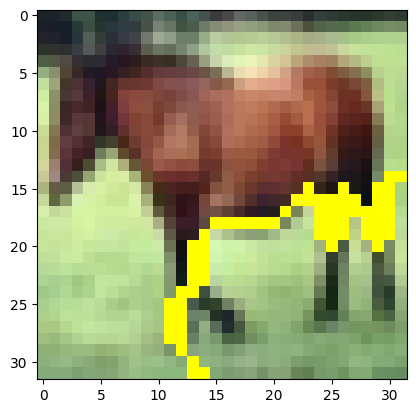

In [104]:
from skimage.segmentation import mark_boundaries
from matplotlib import pyplot as plt
plt.imshow(mark_boundaries(explanation.image, explanation.segments))
plt.show()